<p style="text-align:center; color: #f21170; font-size: 25px;"><b>Breast Cancer Data Analysis and Predictions</b></p>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


<h2 style="font-weight:bold; color:#022e57;">Introduction</h2>

<p style="font-size: 16px">Breast cancer is cancer that forms in the cells of the breasts. Signs of breast cancer may include a lump in the breast, a change in breast shape, dimpling of the skin, fluid coming from the nipple, a newly inverted nipple, or a red or scaly patch of skin. <br><br>Most types of breast cancer are easy to diagnose by microscopic analysis of a sample - or biopsy - of the affected area of the breast. Also, there are types of breast cancer that require specialized lab exams.<br><br>The uncontrolled cancer cells often invade other healthy breast tissue and can travel to the lymph nodes under the arms. The lymph nodes are a primary pathway that help the cancer cells move to other parts of the body. </p>

<h2 style="font-weight:bold; color:#022e57;">Description of Attributes</h2>

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

<h2 style="font-weight:bold; color:#022e57;">Content</h2>

1. [Exploratory Data Analysis](#section1)
2. [Data Preprocessing and Building Models](#section2)
2. [Results](#section3)


<a id="section1"></a>
<h1 style="font-weight:bold; color:#022e57;">1. Exploratory Data Analysis</h1>

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')

In [4]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

<p style="font-size: 16px;">It was already given but we still checked for NaN values and found that the whole column'Unamed: 32' had NaN values. So I will drop this column.</p>

In [7]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

Dropping 'Unnamed: 32' column.

In [8]:
df.drop("Unnamed: 32", axis=1, inplace=True)

<h2 style="font-weight:bold; color:#005a8d;">1.1 Data Visualizations</h2>

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

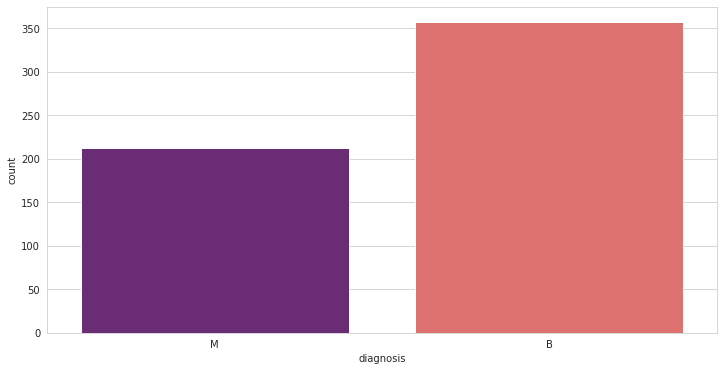

In [9]:
sns.set_style('whitegrid')
plt.figure(figsize = (12,6))
sns.countplot(x="diagnosis", data=df, palette='magma')

<AxesSubplot:>

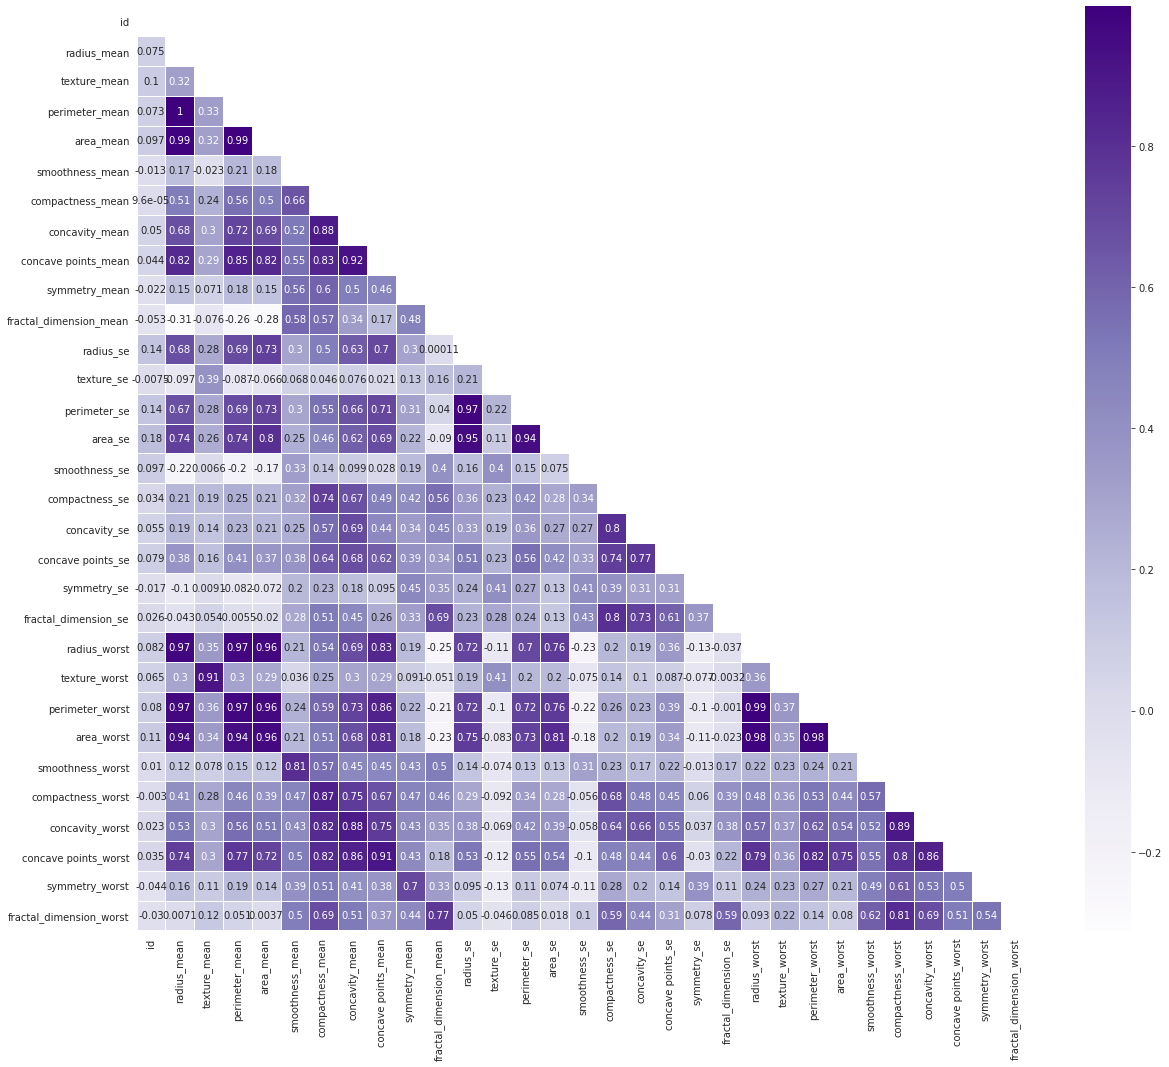

In [10]:
plt.figure(figsize=(20,17))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, linewidth=.5, mask=matrix, cmap="Purples")

As we can observe from the heatmaps that there are many negative correlations in this dataset. Lets observe these by plotting it out.

<h3 style="font-weight:bold; color:#005a8d;">Negative Correlations</h3>

<p style="font-size: 16px;">The column <b>'fractal_dimension_mean'</b> had many negative correlations with many other attributes like <b>'area_mean'</b>, <b>'area_worst'</b> etc. We'll plot some scatter plots for these.<br><br> For your information Fractal analysis of images of breast tissue specimens provides a numeric description of tumour growth patterns as a continuous number between 1 and 2. This number is known as the Fractal Dimension

<AxesSubplot:xlabel='symmetry_se', ylabel='radius_worst'>

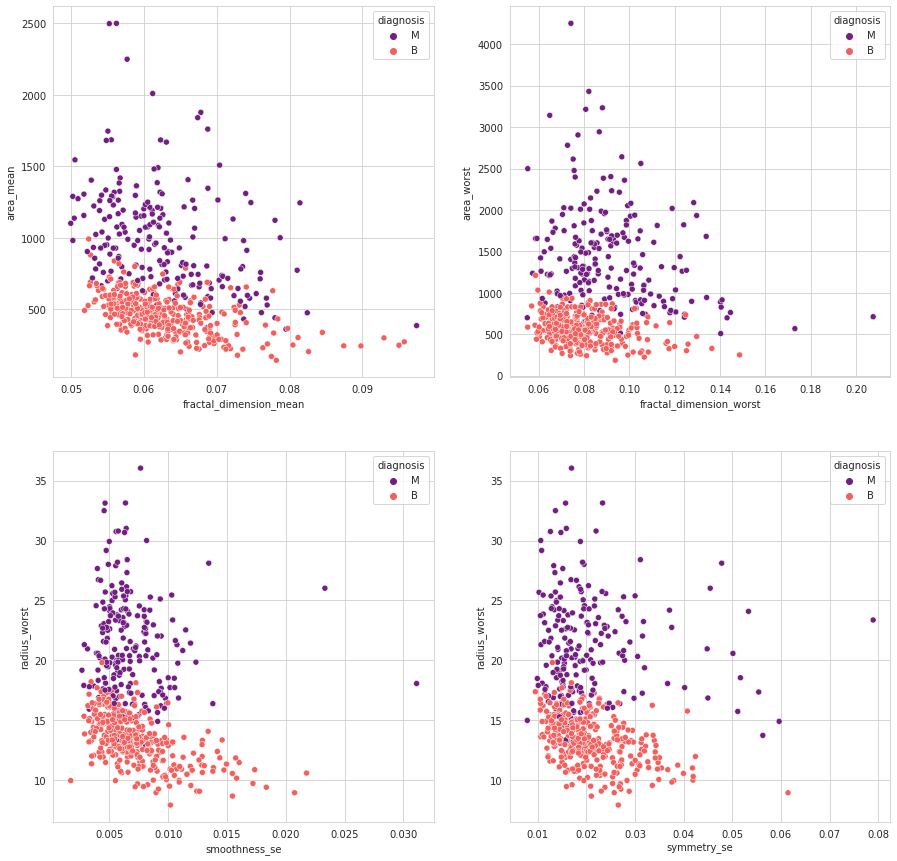

In [11]:
fig, ax = plt.subplots(2,2, figsize=(15,15))
sns.scatterplot(x='fractal_dimension_mean', y='area_mean', hue="diagnosis", 
                data=df, ax=ax[0][0], palette='magma')
sns.scatterplot(x='fractal_dimension_worst', y='area_worst', hue="diagnosis", 
                data=df, ax=ax[0][1], palette='magma')
sns.scatterplot(x='smoothness_se', y='radius_worst', hue="diagnosis", 
                data=df, ax=ax[1][0], palette='magma')
sns.scatterplot(x='symmetry_se', y='radius_worst', hue="diagnosis", 
                data=df, ax=ax[1][1], palette='magma')

<h3 style="font-weight:bold; color:#005a8d;">Some Pairplots</h3>

In [12]:
# Creating a list of columns with only the columns that represent the mean.
mean_cols = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Creating a list of columns with only the columns that represent the worst values.
worst_cols = ['diagnosis','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

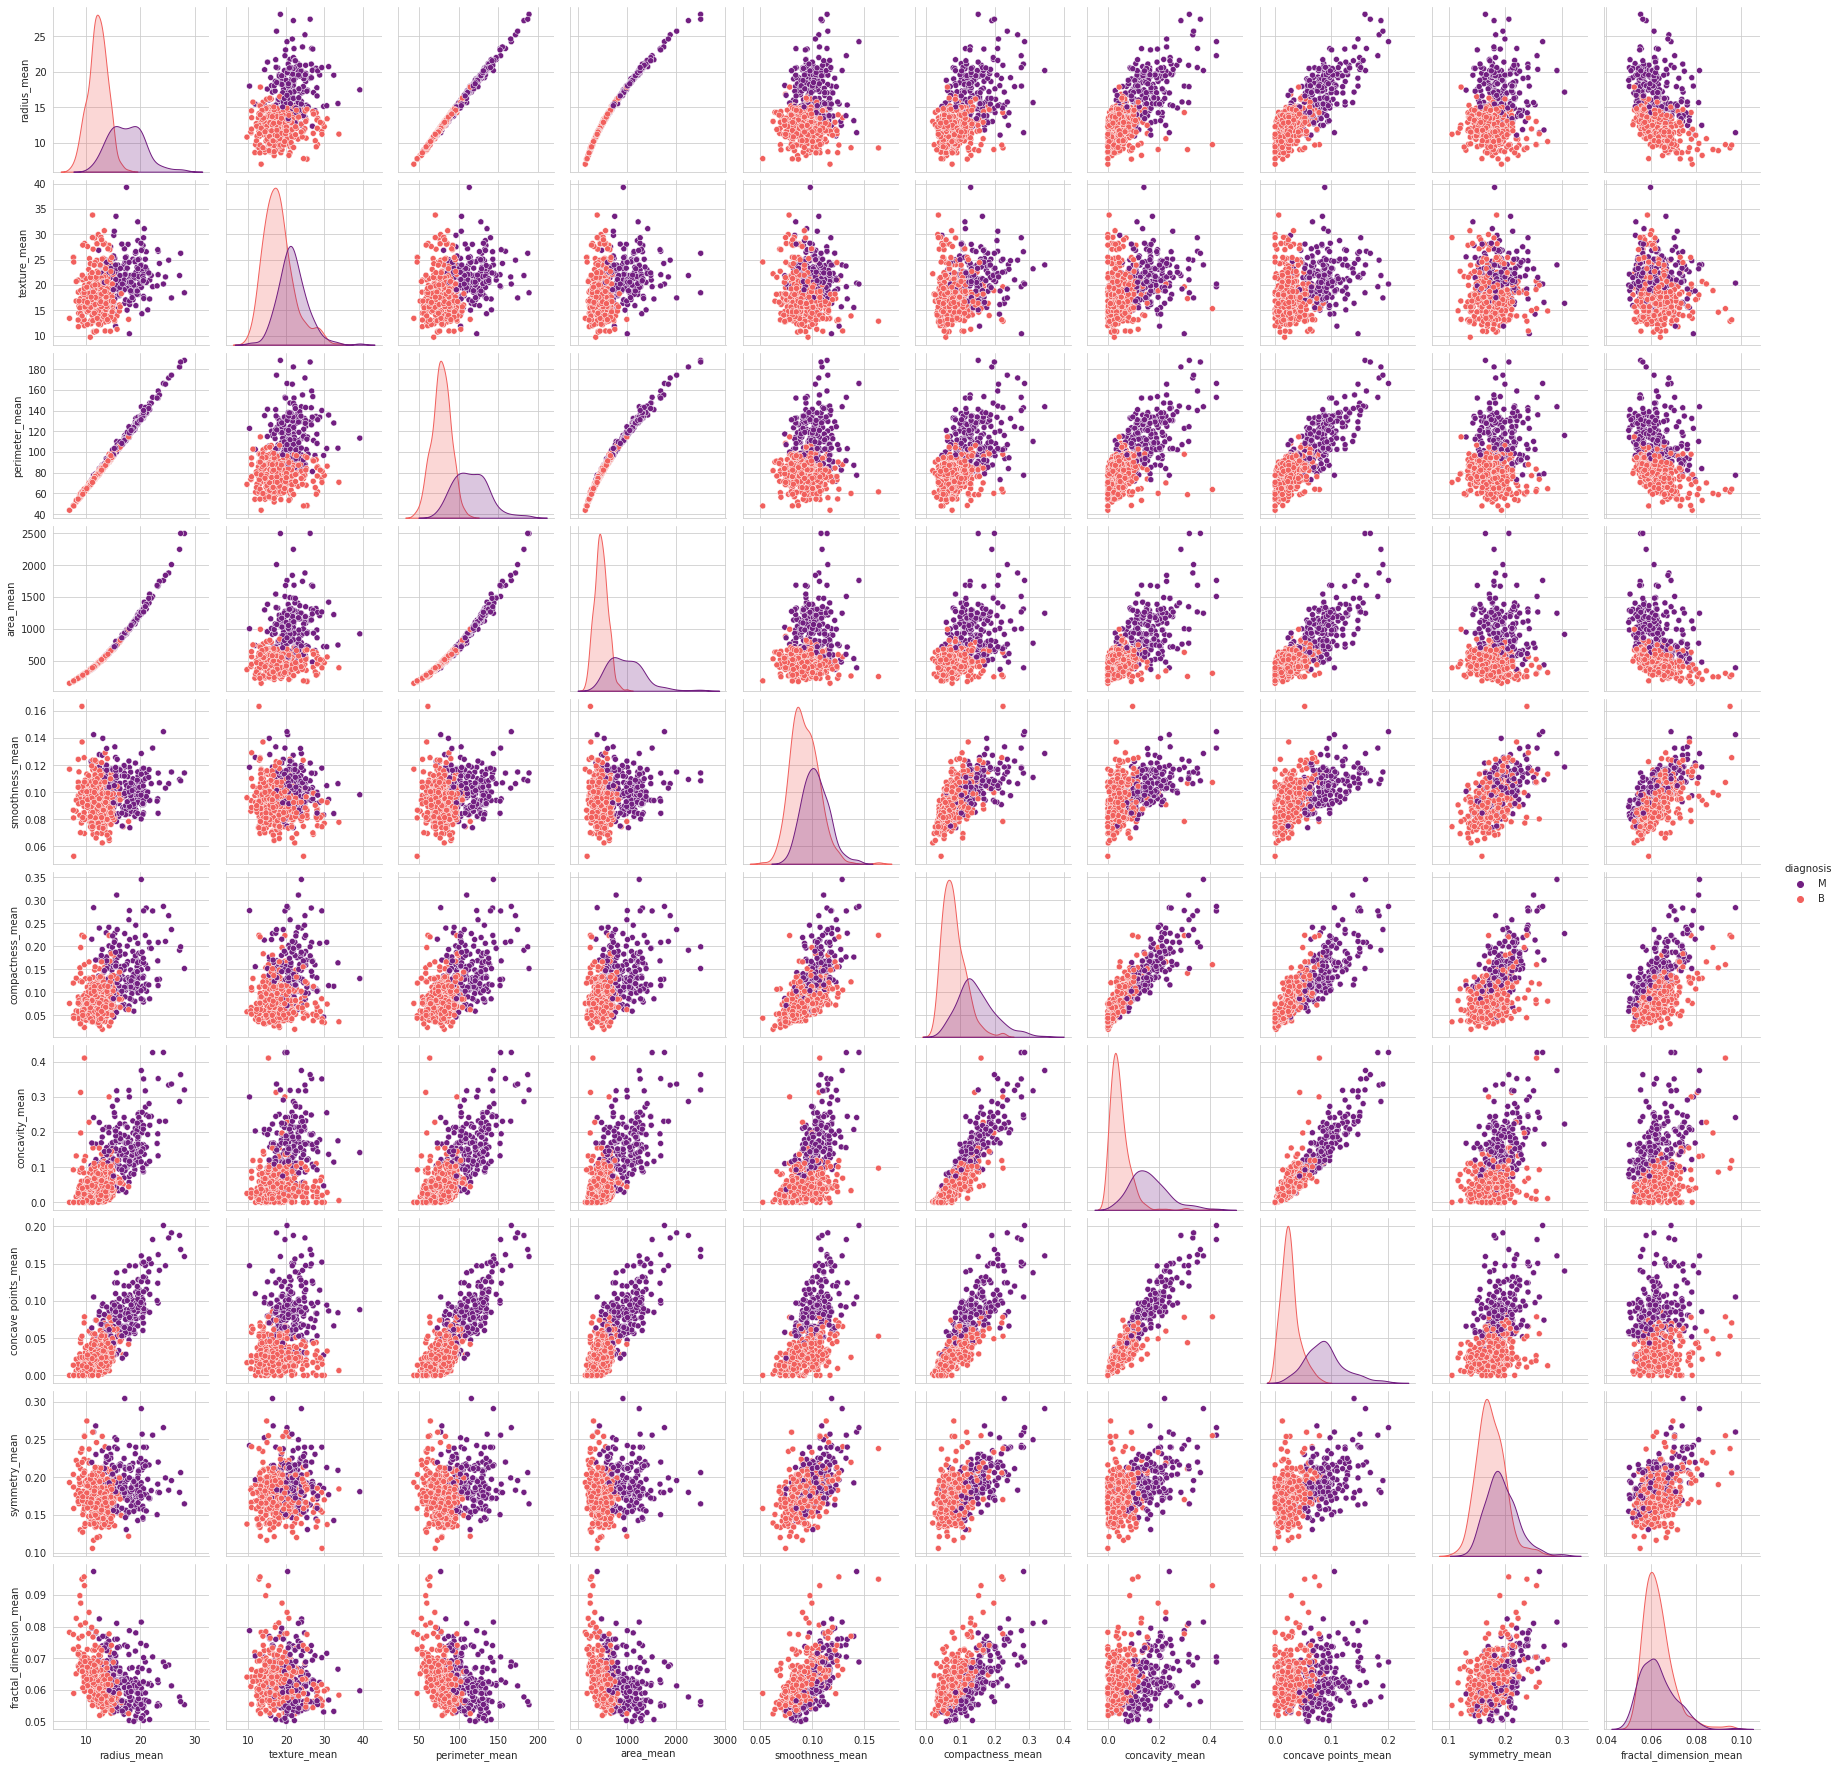

In [13]:
sns.pairplot(df[mean_cols], hue="diagnosis", palette='magma')

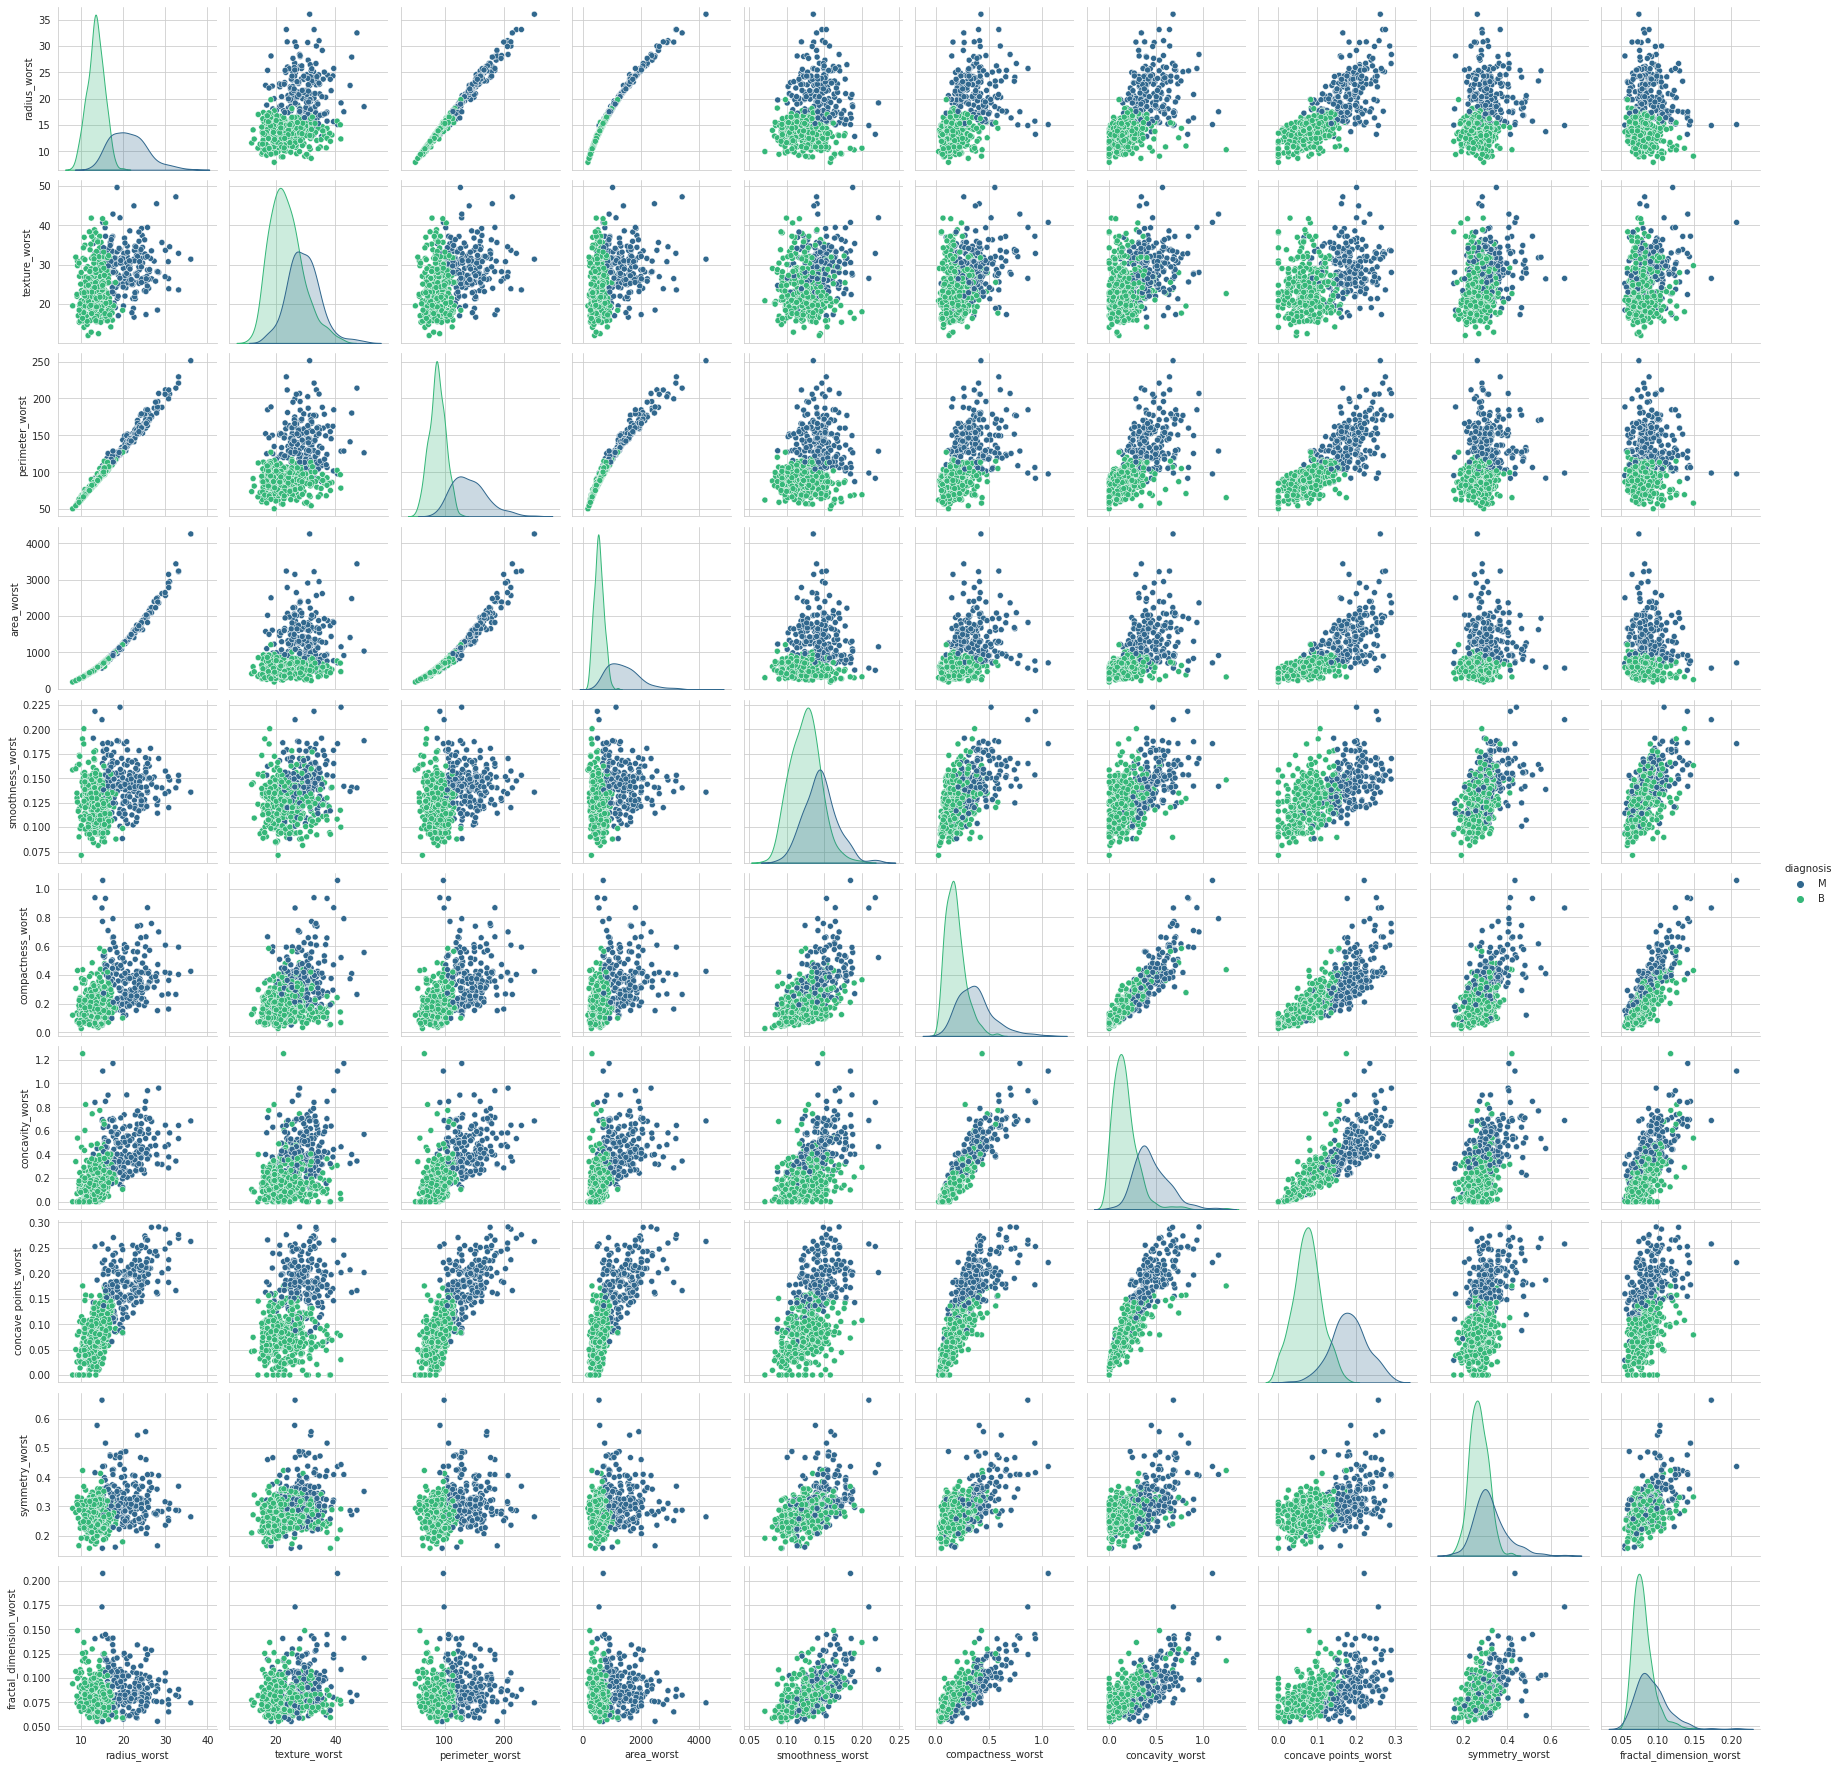

In [14]:
sns.pairplot(df[worst_cols], hue="diagnosis", palette='viridis')

<a id="section2"></a>
<h1 style="font-weight:bold; color:#022e57;">2. Data Preprocessing and Building Models</h1>

<h2 style="font-weight:bold; color:#005a8d;">2.1 Data Preprocessing</h2>

In [15]:
df['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

We need to convert this categorical column into a numerical one using Label Encoder

In [16]:
tgt = df['diagnosis']
from sklearn.preprocessing import LabelEncoder
encode_lbl = LabelEncoder()
target = encode_lbl.fit_transform(tgt)

'target' is our new numerical target column for our modelling.

<h2 style="font-weight:bold; color:#005a8d;">2.2 Splitting the Data into train and test</h2>

In [17]:
from sklearn.model_selection import train_test_split
X = df.drop('diagnosis', axis=1)
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

Shape of training set: (398, 31)
Shape of test set: (171, 31)


In [18]:
from sklearn.preprocessing import StandardScaler
s_sc = StandardScaler()
X_train = s_sc.fit_transform(X_train)
X_test = s_sc.fit_transform(X_test)

<h2 style="font-weight:bold; color:#005a8d;">2.3 Classification Models</h2>

<h3 style="font-weight:bold; color:#005a8d;">2.3.1 Logistic Regression</h3>

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [20]:
logmodel = LogisticRegression()

In [21]:
logmodel.fit(X_train, y_train)
predictions1 = logmodel.predict(X_test)

In [22]:
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions1))
print('\n')
print(classification_report(y_test, predictions1))

Confusion Matrix: 
 [[105   0]
 [  3  63]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.99       105
           1       1.00      0.95      0.98        66

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [23]:
logmodel_acc = accuracy_score(y_test, predictions1)
print("Accuracy of the Logistic Regression Model is: ", logmodel_acc)

Accuracy of the Logistic Regression Model is:  0.9824561403508771


<h3 style="font-weight:bold; color:#005a8d;">2.3.2 K Nearest Neighbours</h3>

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
predictions2 = knn.predict(X_test)

In [26]:
print(confusion_matrix(y_test, predictions2))
print("\n")
print(classification_report(y_test, predictions2))

[[101   4]
 [  5  61]]


              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.94      0.92      0.93        66

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



So we can observe from the Classification report that we have an accuracy of around 0.95. I'll try to increase the accuracy a bit more by using a better value for n_neighbors or K value.

In [27]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

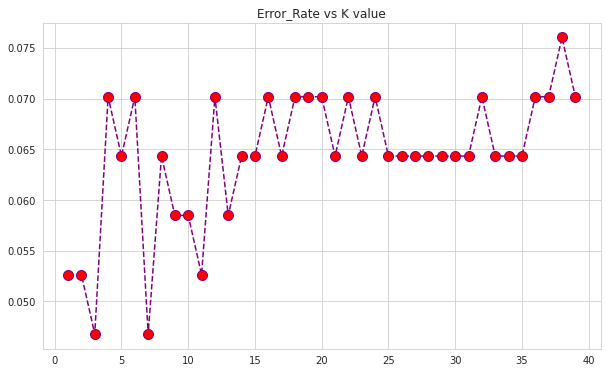

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='purple', linestyle="--",marker='o', markersize=10, markerfacecolor='red')
plt.title('Error_Rate vs K value')
plt.xlabel = ('K')
plt.ylabel = ('Error Rate')

From this graph, K value of 3 and 7 seem to show the lowest mean error. So I'll use one of these values and check.

In [29]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
predictions2 = knn.predict(X_test)

In [30]:
print(confusion_matrix(y_test, predictions2))
print("\n")
print(classification_report(y_test, predictions2))

[[103   2]
 [  6  60]]


              precision    recall  f1-score   support

           0       0.94      0.98      0.96       105
           1       0.97      0.91      0.94        66

    accuracy                           0.95       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



So, there were not any significant changes in the accuracy score other than the 0.1 increase in macro avg. So for now I'll use this as my accuracy score for KNN

In [31]:
knn_model_acc = accuracy_score(y_test, predictions2)
print("Accuracy of K Neighbors Classifier Model is: ", knn_model_acc)

Accuracy of K Neighbors Classifier Model is:  0.9532163742690059


<h3 style="font-weight:bold; color:#005a8d;">2.3.3 Decision Tree</h3>

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions3 = dtree.predict(X_test)

In [34]:
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions3))
print("\n")
print(classification_report(y_test, predictions3))

Confusion Matrix: 
 [[101   4]
 [  8  58]]


              precision    recall  f1-score   support

           0       0.93      0.96      0.94       105
           1       0.94      0.88      0.91        66

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.93       171
weighted avg       0.93      0.93      0.93       171



In [35]:
dtree_acc = accuracy_score(y_test, predictions3)
print("Accuracy of Decision Tree Model is: ", dtree_acc)

Accuracy of Decision Tree Model is:  0.9298245614035088


<h3 style="font-weight:bold; color:#005a8d;">2.3.4 Random Forests</h3>

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)
predictions4 = rfc.predict(X_test)

In [38]:
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions4))
print("\n")
print(classification_report(y_test, predictions4))

Confusion Matrix: 
 [[102   3]
 [  6  60]]


              precision    recall  f1-score   support

           0       0.94      0.97      0.96       105
           1       0.95      0.91      0.93        66

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [39]:
rfc_acc = accuracy_score(y_test, predictions4)
print("Accuracy of Random Forests Model is: ", rfc_acc)

Accuracy of Random Forests Model is:  0.9473684210526315


<h3 style="font-weight:bold; color:#005a8d;">2.3.5 Support Vector Machines (SVM)</h3>

In [40]:
from sklearn.svm import SVC

In [41]:
svc_model = SVC(kernel="rbf")
svc_model.fit(X_train, y_train)
predictions5 = svc_model.predict(X_test)

In [42]:
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions5))
print("\n")
print(classification_report(y_test, predictions5))

Confusion Matrix: 
 [[104   1]
 [  3  63]]


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       105
           1       0.98      0.95      0.97        66

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171



In [43]:
svm_acc = accuracy_score(y_test, predictions5)
print("Accuracy of SVM model is: ", svm_acc)

Accuracy of SVM model is:  0.9766081871345029


<a id="section3"></a>
<h1 style="font-weight:bold; color:#022e57;">3. Results</h1>

<p style="font-size:18px; color: #fb3640; font-weight: 500;">The accuracy of Logistic Regression Model is 98.245%<br>The accuracy of KNN model is 95.321%<br>The accuracy of Decision Tree Model is 90.643%<br>The accuracy of Random Forest Model is 94.736%<br>The accuracy of SVM Model is 97.660%</p>

In [44]:
print(logmodel_acc)
print(knn_model_acc)
print(dtree_acc)
print(rfc_acc)
print(svm_acc)

0.9824561403508771
0.9532163742690059
0.9298245614035088
0.9473684210526315
0.9766081871345029


<AxesSubplot:>

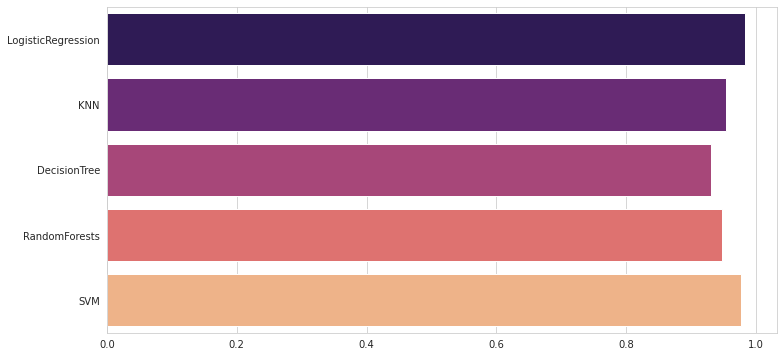

In [45]:
plt.figure(figsize=(12,6))
model_acc = [logmodel_acc, knn_model_acc, dtree_acc, rfc_acc, svm_acc]
name_of_model = ['LogisticRegression', 'KNN', 'DecisionTree', 'RandomForests', 'SVM']
sns.barplot(x= model_acc, y=name_of_model, palette='magma')

<h3 style="color: #2978b5; text-align:center;">LOGISTIC REGRESSION MODEL PERFORMED THE BEST WITH AN ACCURACY OF 98.24%</h3>
<h3 style="color: #2978b5; text-align:center;">SVM IS JUST BEHIND, ALSO WITH A GOOD ACCURACY OF 97.66%</h3>

<p style="font-size:18px; color: #185adb; text-align:center;">Please do leave your valuable feedbacks in the comments and any improvements or suggestions are welcomed!</p>
<h1 style="color: #f55c47; text-align:center;">The End</h1>